In [1]:
import pandas as pd
import numpy as np
import joblib

In [3]:
df = pd.read_csv('test_set_SVM.csv')
df.head()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,Diabetes_binary
0,0.881159,0.950189,0.158387,3.252232,-0.952010,-0.256106,-0.415678,-1.537221,-1.256502,0.518296,...,3.110695,1.047736,-0.459731,-0.076720,1.723295,-0.91731,0.496401,-0.890490,-0.782495,1.0
1,0.881159,0.950189,0.158387,0.161114,1.050409,-0.256106,2.405711,0.650525,0.795861,0.518296,...,-0.321472,0.149098,-0.459731,-0.575632,1.723295,-0.91731,1.197751,-0.890490,-0.782495,0.0
2,0.881159,0.950189,0.158387,-1.665456,1.050409,-0.256106,-0.415678,-1.537221,0.795861,0.518296,...,-0.321472,0.149098,-0.459731,-0.575632,-0.580284,-0.91731,1.548427,-0.890490,-1.702428,1.0
3,-1.134869,-1.052422,0.158387,-1.243939,1.050409,-0.256106,-0.415678,0.650525,0.795861,0.518296,...,-0.321472,-1.648179,-0.459731,-0.575632,-0.580284,-0.91731,-0.555625,1.051358,1.057370,0.0
4,0.881159,0.950189,0.158387,1.144652,-0.952010,-0.256106,-0.415678,0.650525,-1.256502,-1.929401,...,-0.321472,0.149098,-0.459731,-0.376067,-0.580284,-0.91731,-0.555625,-0.890490,1.057370,1.0


In [5]:
X_test = df.drop(columns='Diabetes_binary').values.astype(np.float32)
y_test = df['Diabetes_binary'].values.astype(np.int64)

In [7]:
best_SVM = joblib.load('best_SVM.pkl')

In [9]:
y_pred = best_SVM.predict(X_test)

In [11]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Printing results
print(f"Accuracy : {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")

Accuracy : 0.7525
Precision: 0.7190
Recall   : 0.8288
F1 Score : 0.7700


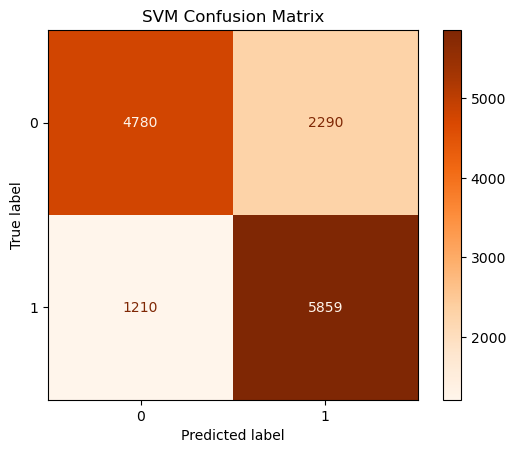

In [15]:
# Importing functions to plot confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Plotting confusion matrix on true vs predicted values
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Oranges')
plt.title("SVM Confusion Matrix")
plt.show()

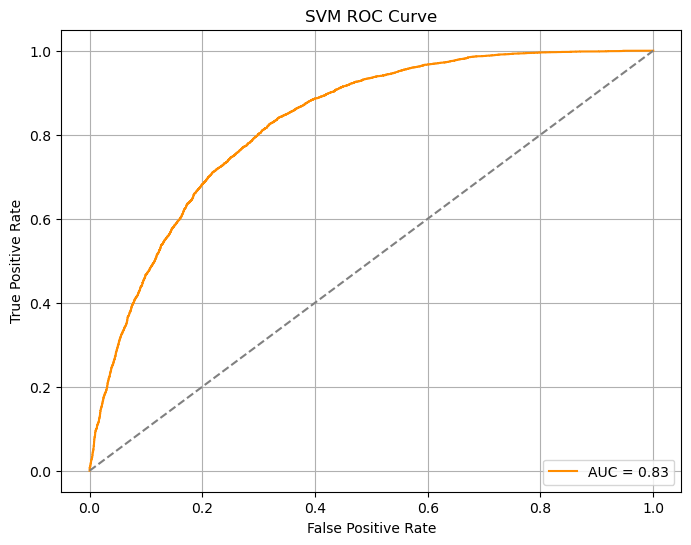

In [21]:
# Importing functions to plot and evaluate the area under the ROC curve
from sklearn.metrics import roc_curve, roc_auc_score, RocCurveDisplay

# Getting probabilities for class 1
y_scores = best_SVM.decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_scores)
auc_score = roc_auc_score(y_test, y_scores)

# Plotting the curve
plt.figure(figsize=(8,6))  # Specifying figure size
plt.plot(fpr, tpr, label=f'AUC = {auc_score:.2f}', color='darkorange')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Diagonal line for random guessing
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('SVM ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()